In [2]:
# modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('every_ufc_fight_model_ready.csv')

In [3]:
df.head()

,index,date,event_name,winner,first_fighter_name,second_fighter_name,first_fighter_KD,second_fighter_KD,first_fighter_STR,second_fighter_STR,...,second_fighter_round_5_DISTANCE_landed,second_fighter_round_5_DISTANCE_attempted,first_fighter_round_5_CLINCH_landed,first_fighter_round_5_CLINCH_attempted,second_fighter_round_5_CLINCH_landed,second_fighter_round_5_CLINCH_attempted,first_fighter_round_5_GROUND_landed,first_fighter_round_5_GROUND_attempted,second_fighter_round_5_GROUND_landed,second_fighter_round_5_GROUND_attempted
0,0,17-Jun-23,UFC Fight Night: Vettori vs. Cannonier,1,Jared Cannonier,Marvin Vettori,0,0,241,153,...,36.0,66.0,1.0,1.0,6.0,7.0,0.0,0.0,7.0,9.0
1,1,17-Jun-23,UFC Fight Night: Vettori vs. Cannonier,0,Joaquim Silva,Arman Tsarukyan,0,0,23,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,17-Jun-23,UFC Fight Night: Vettori vs. Cannonier,1,Armen Petrosyan,Christian Leroy Duncan,0,0,89,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,17-Jun-23,UFC Fight Night: Vettori vs. Cannonier,1,Pat Sabatini,Lucas Almeida,0,0,27,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,17-Jun-23,UFC Fight Night: Vettori vs. Cannonier,0,Nikolas Motta,Manuel Torres,0,1,7,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

filter_method = [
    'Decision - Unanimous',
    'Decision - Split',
    'Decision - Majority'
    ]

# select only decisions and 3 round fights
df_model = df[(df['method'].isin(filter_method)) & (df['number_of_rounds'] == 3)]
# df[(df['method'] in []) & (df['B'] == 'c')]
# df[df['A'].isin([1, 2, 3])]

drop_cols = [
    'index',
    'date',
    'event_name',
    'first_fighter_name',
    'second_fighter_name',
    'method',
    'number_of_rounds'
    ]

df_model = df_model.drop(drop_cols, axis=1)
df_model = df_model.dropna(axis=1)

df_model.describe()

,winner,first_fighter_KD,second_fighter_KD,first_fighter_STR,second_fighter_STR,first_fighter_TD,second_fighter_TD,first_fighter_SUB,second_fighter_SUB,first_fighter_round_1_KD,...,second_fighter_round_3_DISTANCE_landed,second_fighter_round_3_DISTANCE_attempted,first_fighter_round_3_CLINCH_landed,first_fighter_round_3_CLINCH_attempted,second_fighter_round_3_CLINCH_landed,second_fighter_round_3_CLINCH_attempted,first_fighter_round_3_GROUND_landed,first_fighter_round_3_GROUND_attempted,second_fighter_round_3_GROUND_landed,second_fighter_round_3_GROUND_attempted
count,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,...,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000
mean,0.512591,0.108350,0.115308,49.852883,48.817429,1.504639,1.537111,0.365805,0.410205,0.057323,...,12.792578,33.793903,2.255799,3.271372,2.274354,3.340954,2.081511,3.027170,2.029490,2.944003
std,0.499924,0.373807,0.383567,29.272421,28.240329,1.969980,2.029150,0.846947,0.931916,0.260722,...,11.840311,27.115179,3.432696,4.663583,3.542480,4.776689,4.641469,6.571192,4.406446,6.306279
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,29.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,45.000000,44.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,10.000000,28.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,65.000000,64.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,18.000000,50.000000,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000,3.000000
max,1.000000,5.000000,5.000000,238.000000,202.000000,13.000000,21.000000,7.000000,10.000000,4.000000,...,125.000000,218.000000,32.000000,45.000000,37.000000,48.000000,66.000000,97.000000,56.000000,81.000000


In [27]:
df_model.dtypes

winner                                       int64
first_fighter_KD                             int64
second_fighter_KD                            int64
first_fighter_STR                            int64
second_fighter_STR                           int64
                                            ...   
second_fighter_round_3_CLINCH_attempted    float64
first_fighter_round_3_GROUND_landed        float64
first_fighter_round_3_GROUND_attempted     float64
second_fighter_round_3_GROUND_landed       float64
second_fighter_round_3_GROUND_attempted    float64
Length: 135, dtype: object

In [30]:
# Normalize the data
columns_to_scale = df_model.columns.drop('winner')
scaler = StandardScaler()
df_model[columns_to_scale] = scaler.fit_transform(df_model[columns_to_scale])

X = df_model.drop('winner', axis=1)
y = df_model['winner'].astype('category')

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8327814569536424
Precision: 0.8481848184818482
Recall: 0.8237179487179487
F1 Score:  0.8357723577235773


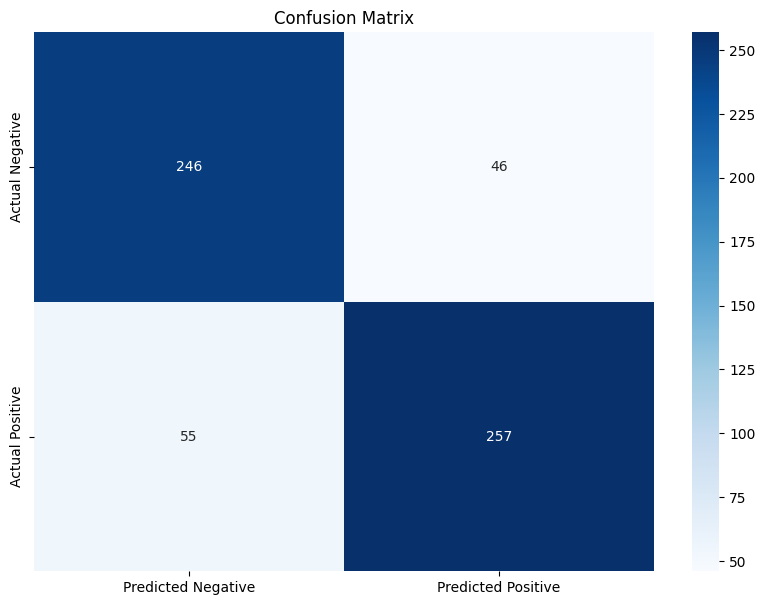

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Generate and print confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
# Convert confusion matrix to a dataframe for better visualization
cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'],
                     index=['Actual Negative', 'Actual Positive'])

# Plot the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Transform coefficients to odds ratios
odds_ratios = np.exp(model.coef_)

# Create a DataFrame for easy visualization
coef_df = pd.DataFrame({'features': X_train.columns, 'coef': odds_ratios[0]})
# Sort by coef value
coef_df = coef_df.sort_values('coef', ascending=False)

# Display the DataFrame
print(coef_df)

                                    features      coef
2                          first_fighter_STR  9.547261
4                           first_fighter_TD  2.166528
82       first_fighter_round_1_GROUND_landed  1.640387
55   first_fighter_round_3_TOT_STR_attempted  1.589251
73      second_fighter_round_1_LEG_attempted  1.560511
..                                       ...       ...
97      second_fighter_round_2_LEG_attempted  0.690417
33  second_fighter_round_1_TOT_STR_attempted  0.657483
83    first_fighter_round_1_GROUND_attempted  0.610839
5                          second_fighter_TD  0.478799
3                         second_fighter_STR  0.096585

[134 rows x 2 columns]


Features:
* Combine columns into a difference column, so strikes would be strike differential
* Accuracy percentages
* Add a time component (era of fight, index column, etc.)
* Lasso, multicolinearity checks, etc.